# <center>Unveiling the Cinematic World:</center> 
# <center>Exploring Patterns and Insights in a Movies Dataset</center>


## Introduction
The world of cinema is a captivating realm that has captivated audiences for over a century. Movies have the power to transport us to different eras, evoke emotions, and tell compelling stories. With the advent of digital technology and the increasing availability of vast movie datasets, researchers and analysts now have an unprecedented opportunity to delve deeper into the intricate dynamics of the film industry.


##  Understanding the Cinematic Realm and Dataset
This research aims to explore and analyze a comprehensive movies dataset to uncover hidden patterns, insights, and trends that lie within this vast collection of cinematic information. By harnessing the power of data analytics techniques, we aim to shed light on the factors that contribute to a movie's success, audience preferences, and the evolving landscape of the film industry

The movies dataset utilized in this study encompasses a wide range of attributes, including movie titles, genres, release dates, production budgets, gross revenues, ratings, and votes. This rich and diverse dataset provides a fertile ground for investigating numerous aspects of the film industry, such as the impact of genres on gross revenue, production budget on movie score, or the changing trends in movie production over time.

The outcomes of this research have the potential to inform decision-making processes in the film industry, aiding in the strategic planning of movie production, marketing campaigns, and audience targeting. Additionally, the findings may unveil emerging trends and preferences among moviegoers, shedding light on the evolving tastes and demands of audiences in an ever-changing cinematic landscape.

In conclusion, this research endeavors to harness the power of data analysis to unravel the intricate dynamics of the film industry. By exploring a comprehensive movies dataset, we aim to uncover valuable insights, patterns, and trends that shape the success and popularity of movies. Through this exploration, we hope to contribute to the growing body of knowledge in the field and provide actionable insights for industry stakeholders, ultimately enhancing the cinematic experience for movie lovers worldwide.

### About the Data
##### *Context*
Is the movie industry dying? is Netflix the new entertainment king? Those were the first questions that lead me to create a dataset
focused on movie revenue and analyze it over the last decades. But, why stop there? There are more factors that intervene in this
kind of thing, like actors, genres, user ratings and more. And now, anyone with experience (you) can ask specific questions about the
movie industry, and get answers.
Data link https://www.kaggle.com/datasets/danielgrijalvas/movies

##### *Content*
There are 6820 movies in the dataset (220 movies per year, 1986-2016). Each movie has the following attributes:

- budget: the budget of a movie. Some movies don't have this, so it appears as 0

- company: the production company

- country: country of origin

- director: the director

- genre: main genre of the movie.

- gross: revenue of the movie

- name: name of the movie

- rating: rating of the movie (R, PG, etc.)

- released: release date (YYYY-MM-DD)

- runtime: duration of the movie

- score: IMDb user rating

- votes: number of user votes

- star: main actor/actress

- writer: writer of the movie

- year: year of release

##### *Acknowledgements*
This data was scraped from IMDb.

##### *Contribute*
You can contribute via GitHub.

### Questions  
- what are the top 10 Movies with the highest score 
- Top 10 companies with the highest Gross
- which company generated the higest profit
- Does genre have influence on movie score
- How has the average movie runtime evolved over the years, and are there any trends or shifts in movie duration?

### Hypothesis / Performance Measure
#### Hypothesis 1:
NULL: Movie budget has no effects on Gross revenue

AlTERNATE: Movie budget has an effect on revenue.
#### Hypothesis 2: 
NULL: Movie budget has no effect on movie scores

ALTERNATE: Movie budget has an effect on movie scores

## Data Preparation


#### Python Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# To disable the warning that pandas generates when performing chained assignments.
pd.options.mode.chained_assignment = None

# To display max rows and columns
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

#### Import Data

In [2]:
# Reading the data
df = pd.read_csv('movies.csv')

#### Data Cleaning

In [3]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [4]:
df["budget"].fillna(np.mean(df["budget"]),inplace=True)# fillled missing budget rows with its mean
df["gross"].fillna(np.mean(df["gross"]),inplace=True)# fillled missing gross rows with its mean
df.dropna(inplace=True)# dropped null values since only 1% of the ratings row is missing and there is no way to fill it up without aquring new data

In [5]:
# Data has been rid of null values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [6]:
# Budget and Gross Columns to integer

df[["budget", "gross"]] = df[["budget", "gross"]].astype("int64")

In [7]:
# check if there are Duplicated rows

df[df.duplicated()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


- looped through the columns to see the percenatge of the data missing per column if any. went on to work on the data since the missing vlaues in each column with missing values where not up to 50% of the coulmn
- filled in the numeric columns with the mean of their column
- It is impossile to determine the values for the missing rows in the the rating column without more information. so I went ahead and dropped rows with empty columns.
- Changed Budget and Gross Columns data types to integer
- Checked for duplictated rows

#### Data Exploration

### EDA 1

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7574 entries, 0 to 7659
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7574 non-null   object 
 1   rating    7574 non-null   object 
 2   genre     7574 non-null   object 
 3   year      7574 non-null   int64  
 4   released  7574 non-null   object 
 5   score     7574 non-null   float64
 6   votes     7574 non-null   float64
 7   director  7574 non-null   object 
 8   writer    7574 non-null   object 
 9   star      7574 non-null   object 
 10  country   7574 non-null   object 
 11  budget    7574 non-null   int64  
 12  gross     7574 non-null   int64  
 13  company   7574 non-null   object 
 14  runtime   7574 non-null   float64
dtypes: float64(3), int64(3), object(9)
memory usage: 946.8+ KB


General info about data

#### EDA 2 

In [9]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7574.000000,7574.000000,7.574000e+03,7.574000e+03,7.574000e+03,7574.000000
mean,2000.377079,6.389345,8.894074e+04,3.568138e+07,7.898301e+07,107.291128
std,11.108858,0.968411,1.640419e+05,3.527040e+07,1.644290e+08,18.584716
min,1980.000000,1.900000,3.500000e+01,3.000000e+03,3.090000e+02,63.000000
25%,1991.000000,5.800000,9.400000e+03,1.400000e+07,4.843455e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,3.558988e+07,2.151214e+07,104.000000
75%,2010.000000,7.100000,9.400000e+04,3.558988e+07,7.850054e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


General statiistics

#### EDA 3 

In [10]:
# To scale down the data to fit most ofit in the plot
df_srt = df.copy()
df_srt["dwn_scale"] = (df_srt["gross"]/df_srt["gross"].sum()) * 10000
df_srt["dwn_scale"] = df_srt["dwn_scale"].round(2)
# To sort the Gross column
df_srt.sort_values(by=['gross'], inplace=True)

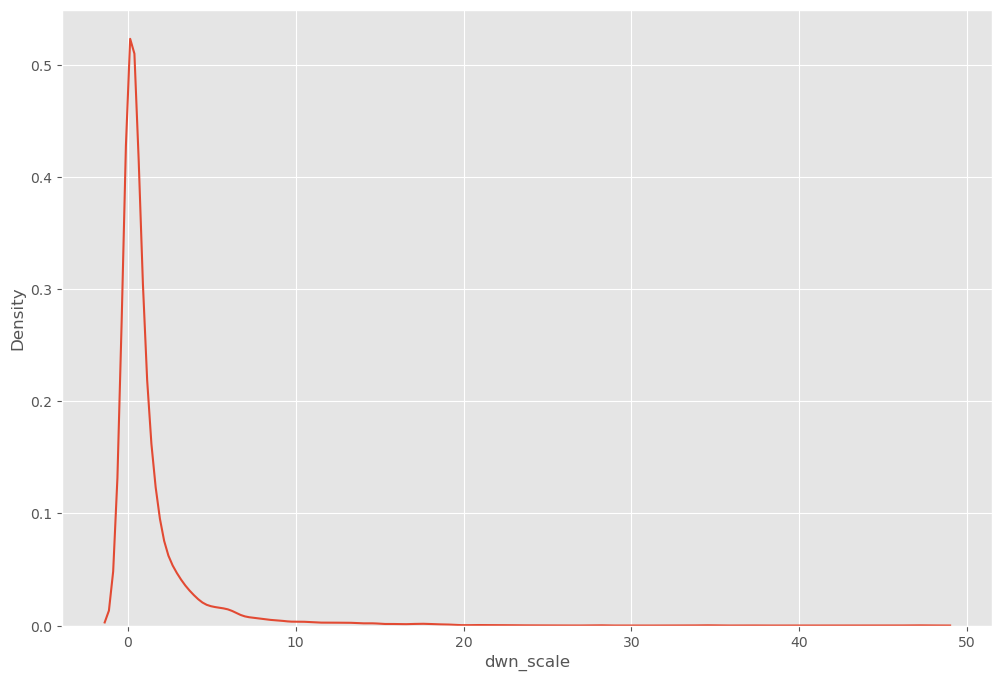

In [11]:
# Are there any Outliers?
sns.kdeplot(df_srt["dwn_scale"])
#plt.ylim([0,10])
plt.show()

##### Observations
- This is to check the distripution of the gross column and check for outliers 
- The curve is skewed right and we can see that from down_scale 10 upwards are far from the other points in the destribution
- These are outliers, why they are far from the mean is yet to be determined

##### Interpretation
A right-skewed curve in gross revenue indicates that a majority of movies in the dataset have relatively lower revenue figures. This could be due to various factors such as low-budget independent films, niche genres, or movies with limited theatrical releases. However, there are a few movies that stand out and achieve exceptional success, generating significantly higher revenues compared to the rest of the movies.

This skewness in the distribution implies that the gross revenue of movies is not evenly distributed but rather concentrated towards the lower end, with a long tail extending towards higher revenue values. The tail represents movies that became major box office hits or blockbusters, attracting a large audience and generating substantial financial success.

It is important to analyze the factors contributing to the success of these high-revenue movies, such as production budget, marketing strategies, genre, star power, release timing, or audience preferences. Understanding the distribution and skewness of gross revenue can help filmmakers, studios, and industry analysts gain insights into the potential for achieving significant financial success in the movie industry.

#### EDA 4

In [12]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


what the dataset now looks like after cleaning

#### EDA 5

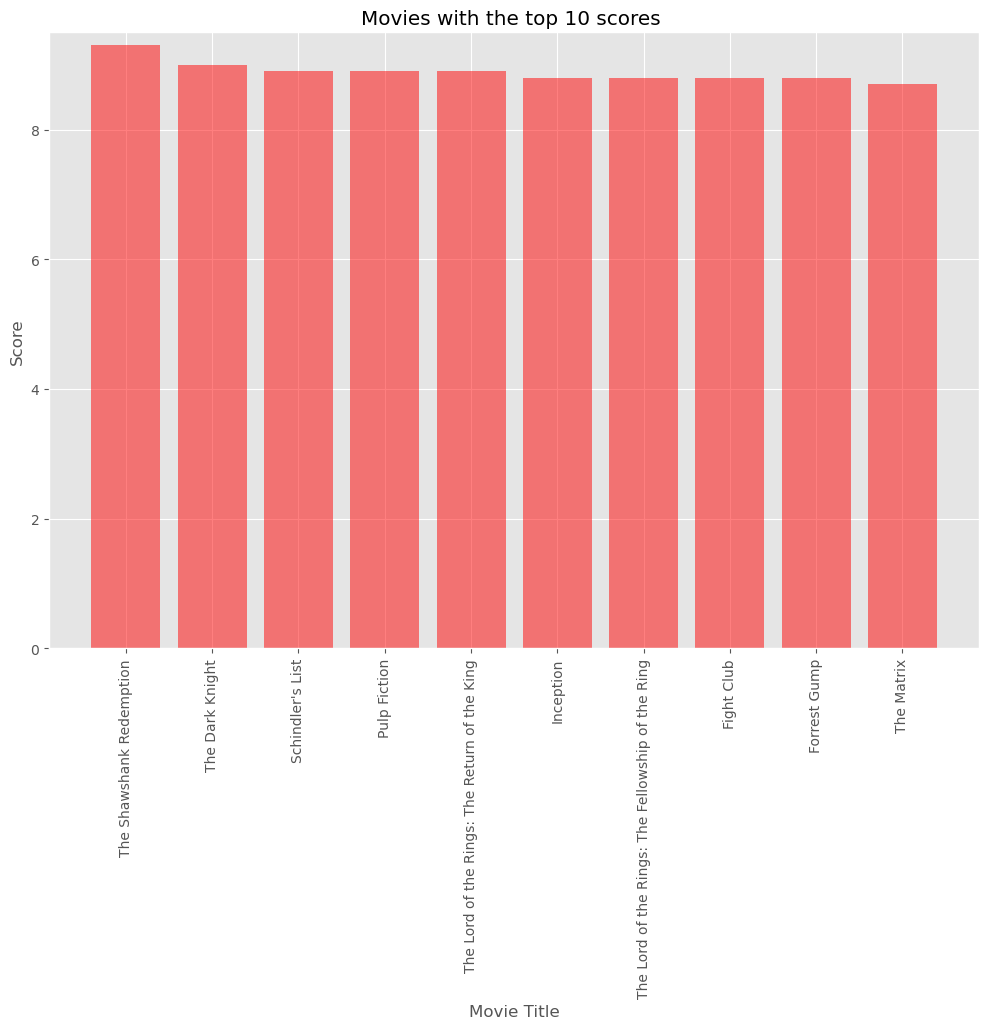

In [13]:
top_movies = df[["name", "score"]].sort_values(by="score",ascending=False).head(10)
plt.bar(top_movies.name, top_movies.score, color="red", alpha=0.5)
plt.title("Movies with the top 10 scores ")
plt.xticks(rotation=90)
plt.ylim([0,9.5])
plt.xlabel("Movie Title")
plt.ylabel("Score")
plt.show()

In [14]:
# Table below shows the top 5 movies interms of rating
top_movies = df[["name", "company", "score"]].sort_values(by="score",ascending=False)
top_movies.head()

,name,company,score
2443,The Shawshank Redemption,Castle Rock Entertainment,9.3
5243,The Dark Knight,Warner Bros.,9.0
2247,Schindler's List,Universal Pictures,8.9
2444,Pulp Fiction,Miramax,8.9
4245,The Lord of the Rings: The Return of the King,New Line Cinema,8.9


- The above bar chart shows the top 10 movies in terms of score.
- The movie with the higest score is **The Shawshank Redemption** with a rating of **9.3**.

#### EDA 6

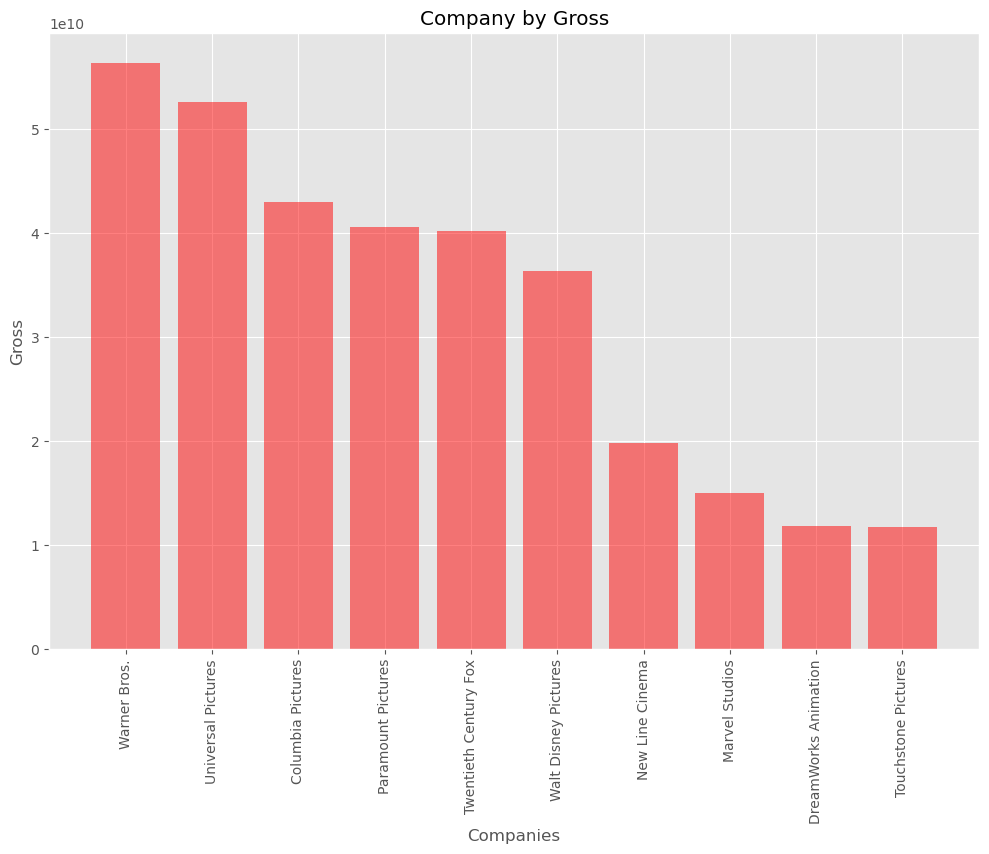

In [15]:
top_comp = df[["company", "gross"]].groupby("company").sum().reset_index().sort_values(by="gross",ascending=False).head(10)
plt.bar(top_comp.company, top_comp.gross, color="red", alpha=0.5)
plt.title("Company by Gross")
plt.xticks(rotation=90)
plt.xlabel("Companies")
plt.ylabel("Gross")
plt.show()

In [16]:
top_comp = df[["company", "gross"]].groupby("company").sum().reset_index().sort_values(by="gross",ascending=False).head(10)
top_comp

,company,gross
2273,Warner Bros.,56407679663
2236,Universal Pictures,52592689431
710,Columbia Pictures,43008941346
1769,Paramount Pictures,40572107956
2208,Twentieth Century Fox,40257053857
2270,Walt Disney Pictures,36327887792
1676,New Line Cinema,19867862616
1571,Marvel Studios,15065592411
864,DreamWorks Animation,11873612858
2187,Touchstone Pictures,11795832638


in EDA 6 the bar chart shows the comapnies with the most revenue. 
As seen below the company with the hiest revenue is the **Warner Bros.**. 
Futher analysis will to done to determine the reason or at least the features the companies have that had a positive impact on the sales of their movies

#### EDA 7

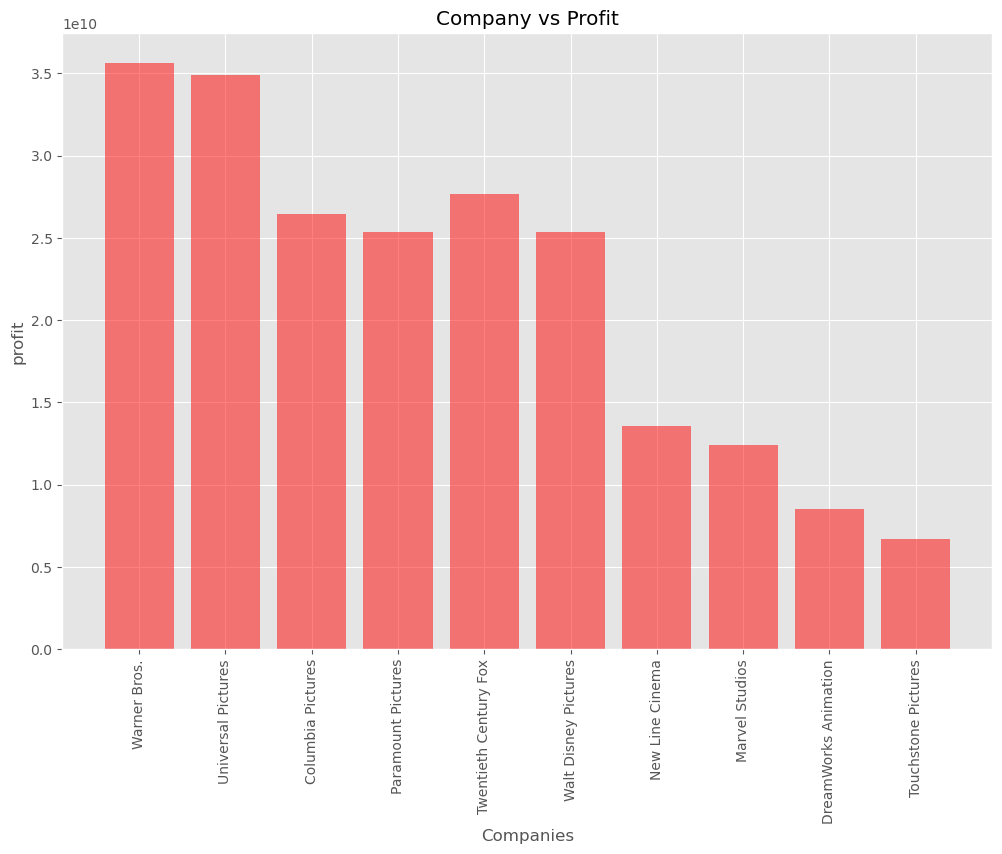

In [17]:
top_comp = df[["company", "gross", "budget"]].groupby("company").sum().reset_index().sort_values(by="gross",ascending=False).head(10)
top_comp['profit'] = top_comp.gross - top_comp.budget
plt.bar(top_comp.company, top_comp.profit, color="red", alpha=0.5)
plt.title("Company vs Profit")
plt.xticks(rotation=90)
plt.xlabel("Companies")
plt.ylabel("profit")
plt.show()

In [18]:
top_comp = df[["company", "gross", "budget"]].groupby("company").sum().reset_index().sort_values(by="gross",ascending=False).head(10)
# To add profit column
top_comp['profit'] = top_comp.gross - top_comp.budget
top_comp.head()

,company,gross,budget,profit
2273,Warner Bros.,56407679663,20748945660,35658734003
2236,Universal Pictures,52592689431,17662454173,34930235258
710,Columbia Pictures,43008941346,16579803280,26429138066
1769,Paramount Pictures,40572107956,15182634916,25389473040
2208,Twentieth Century Fox,40257053857,12577886156,27679167701


in EDA 7 the bar chart show the profit generated from each movie per company. Considering the data from EDA 6 it's no surprise that the company with the highest profit is **Warner Bros.**

#### EDA 8

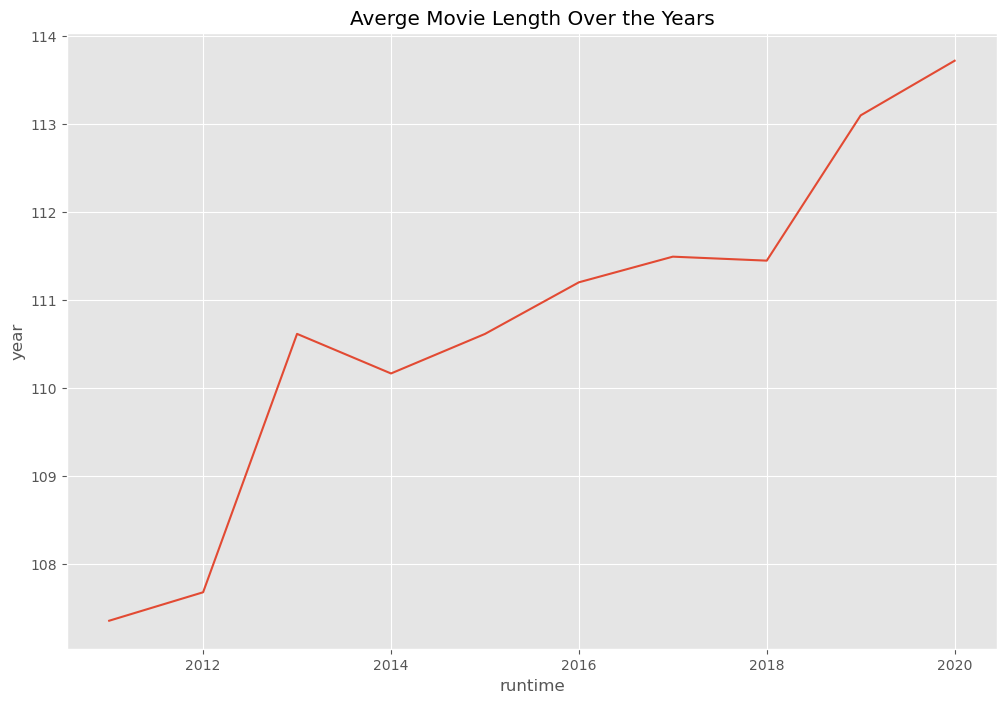

In [19]:
dur_change = df[["year", "runtime"]].groupby(by="year").mean().reset_index().sort_values(by="year",ascending=False).head(10)
sns.lineplot(x="year", y ="runtime", data=dur_change)
plt.title("Averge Movie Length Over the Years")
#plt.xticks(rotation=90)
plt.xlabel("runtime")
plt.ylabel("year")
plt.show()

in EDA 8 the line shows the length of movies over the years, I observed that movie length as risen over the years 

### Hypothesis Testing

### HT 1

**Hypothesis 1**:
    
NULL: Movie budget has no effects on Gross revenue

AlTERNATE: Movie budget has an effect on revenue.

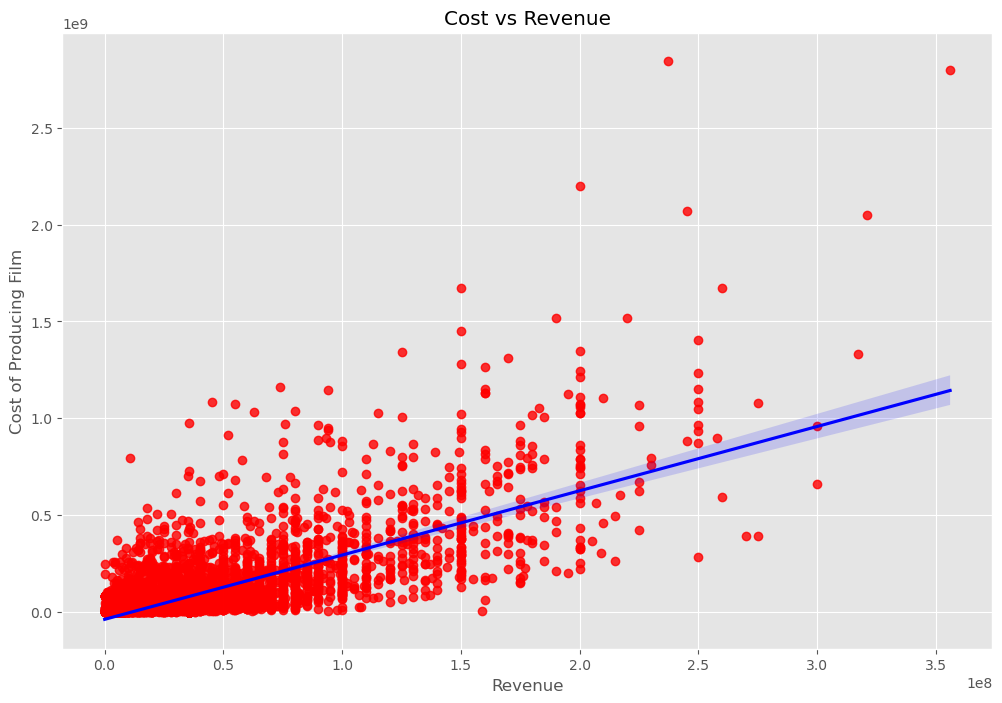

In [21]:
# Budget = Cost of Producing Film
# Gross = Revenue
sns.regplot(x="budget", y="gross", data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

plt.title("Cost vs Revenue")

plt.xlabel('Revenue')

plt.ylabel('Cost of Producing Film')

plt.show()

In [22]:
correlation = df['budget'].corr(df['gross'])
print(correlation)

0.7126140888627853


A positive correlation of **0.71** between budget and gross revenue indicates that there is a tendency for movies with higher budgets to generate higher gross revenues. In other words, as the budget allocated to a movie increases, it is more likely to result in greater financial success in terms of revenue.

This correlation implies that investing more resources into a movie, such as higher production budgets, marketing campaigns, or distribution efforts, can potentially lead to increased audience attraction, wider reach, and higher ticket sales. Movies with larger budgets may have the ability to afford higher production values, renowned actors, cutting-edge special effects, or extensive promotional activities, all of which can contribute to their commercial success.

However, it is important to note that correlation does not imply causation. While a positive correlation suggests a relationship between budget and gross revenue, it does not necessarily mean that increasing the budget will always guarantee higher revenue. Other factors, such as the quality of the movie, storyline, competition, audience preferences, critical reception, and market conditions, also play significant roles in determining a movie's success.

### HT 2

**Hypothesis 2:**

NULL: Movie budget has no effect on movie scores

ALTERNATE: Movie budget has an effect on movie scores

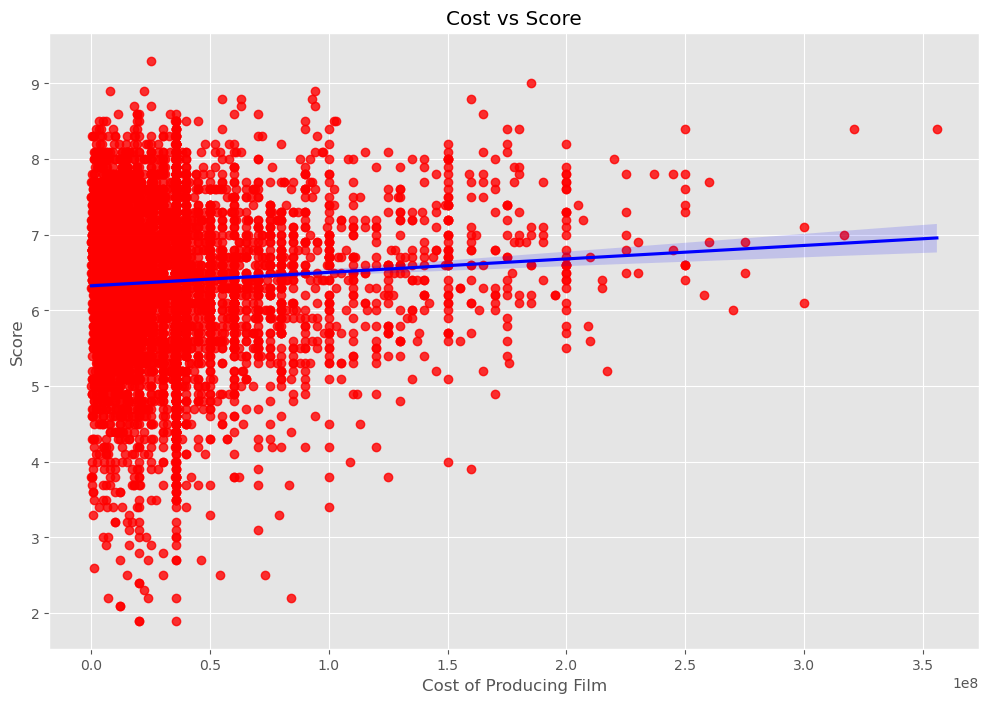

In [23]:
sns.regplot(x="budget", y="score", data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

plt.title("Cost vs Score")

plt.xlabel('Cost of Producing Film')

plt.ylabel('Score')

plt.show()

In [24]:
correlation = df['budget'].corr(df['score'])
print(correlation)

0.06468162916882729


A correlation coefficient of **0.06468162916882729** between budget and movie score suggests a very weak positive correlation between these two variables. Here's an interpretation:

The positive correlation coefficient indicates that there is a slight tendency for movies with higher budgets to have slightly higher movie scores. However, the correlation is close to zero, indicating that the relationship between budget and movie score is very weak.

This weak positive correlation suggests that budget alone does not strongly influence or predict the movie score. Other factors, such as the quality of the script, performances, direction, and audience reception, likely have a more significant impact on determining the movie score.

It's important to note that correlation does not imply causation. Therefore, the presence of a weak positive correlation does not necessarily mean that increasing the budget will result in higher movie scores. Additional analysis and consideration of other factors are necessary to understand the complex relationship between budget and movie score accurately.

Further exploration and examination of the dataset, along with the context of the movie industry and the specific variables being studied, would provide a more comprehensive understanding of the relationship between budget and movie score.

## Conculsion

Looking at **Hypothesis 1** it became clear that spending more on the production of a movies can potentially lead to increased earnings. Investing more resources into a movie, such as higher production budgets, marketing campaigns, or distribution efforts, can potentially lead to increased audience attraction, wider reach, and higher ticket sales. Movies with larger budgets may have the ability to afford higher production values, renowned actors, cutting-edge special effects, or extensive promotional activities, all of which can contribute to their commercial success.

After careful review of **Hypothesis 2** we can conclude there is a slight tendency for movies with higher budgets to have slightly higher movie scores. However, the correlation is close to zero, indicating that the relationship between budget and movie score is very weak. it does not necessarily mean that increasing the budget will always guarantee higher revenue. Other factors, such as the quality of the movie, storyline, competition, audience preferences, critical reception, and market conditions, also play significant roles in determining a movie's success.